# Datalab 2025-2026

<div style="line-height:1;">

## Analyse over elektricitiets gebruik in de Nederlandse markt.

**Groepsnummer: 5**

**Auteurs: Lucas Hoetink, Thomas Galais, Mehmet Kilinc, Joris Zondervan**

<div style="line-height:1.6;">

## **Kernpuntenrapport**

Dit notebook presenteert doormiddel van data van het **CBS** een analytisch overzicht van de **Nederlandse energiemarkt**. Na het opschonen en voorbewerken van de rauwe datasets zijn er verschillende analyses op uitgevoerd om inzicht te krijgen in hoe het elekriciteits gebruik verschilt per gemeente en welke factoren dit beïnvloeden. 

Wij hebben datasets van het CBS doormiddel van <code style="color:#4EC9B0;">pandas</code>, <code style="color:#9CDCFE;">numpy</code> onderzocht. Ook hebben wij met <code style="color:#CE9178;">seaborn</code> en <code style="color:#CE9178;">matplotlib</code> meerdere visualisaties gemaakt om de data gemakkelijk in te zien.

**Belangrijkste bevindingen**:

- 
- 

Deze patronen benadrukken dit en dit en dit


---

## **Importeer de benodigde libraries**

Hier importeren wij <code style="color:#4EC9B0;">pandas</code> en <code style="color:#9CDCFE;">numpy</code>. Ook installeren wij eerst de api voor  <code style="color:#4EC9B0;">cbsodata</code> (CBS open data), en importeren we de library in het notebook.

In [1]:
import pandas as pd
import numpy as np
%pip install cbsodata
import cbsodata
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\joris\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


## **Stel de plotting stijl in**

Om de uniformiteit te bewaren in het hele document gaan we alle grafieken dezelfde stijl geven.

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette('colorblind')
sns.set_style("whitegrid")

---

## **Sprint 3**

<div style="line-height:1.6;">

### **Kernpuntenrapport**

Dit hoofdstuk presenteert een analytisch overzicht van het elektriciteitsverbruik per gemeente. Ook gaat dit hoofdstuk in op de verschillende factoren die het elektriciteitsverbruik per huishouden beïnvloeden.Als laatste gaan wij aan de hand van kenmerken van een buurt voorspellingen doen over het energieverbruik.

**Belangrijkste bevindingen:**

- 
- 

Dit verteld ons dit dit en dit

---

## **Importeer de dataset**

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

**Hoe we dit doen:**

We beginnen met <code style="color:#4EC9B0;">pandas</code> en `.get_data()` van <code style="color:#4EC9B0;">cbsodata</code> om het dataset 84799NED op te halen en meteen om te zetten in een <code style="color:#4EC9B0;">pandas DataFrame</code>. 
We gaan meteen door met data verkenning om de dataset beter te begrijpen. De eerste verkenning met `.head()` en `.shape` geeft ons een snel overzicht van de datastructuur.

De dataset heeft `17341` rijen en `119` kolommen.
`.head()` laat ons de bovenste 5 rijen zien. hieruit kunnen we opmaken waar de dataset over gaat. Het is een dataset met informatie over verschillende wijken in Nederland. De informatie bevat onderwerpen zoals leeftijd, partnerschap, afkomst, geboorte en sterfte totalen, huishoudens, en meer. Interessante kolommen voor ons zijn bijvoorbeeld buurten en informatie over energieverbruik.

In [3]:
# Dataset importeren. Omdat de dataset bovenaan wat extra rijen heeft slaan we die over.
df = pd.DataFrame(cbsodata.get_data('84799NED'))

# Dataset uitlezen
print('De dataset heeft de volgende vorm:', df.shape)
print('\nDe bovenste 5 rijen zijn:\n',df.head())

De dataset heeft de volgende vorm: (17341, 119)

De bovenste 5 rijen zijn:
    ID          WijkenEnBuurten                            Gemeentenaam_1  \
0   0                Nederland  Nederland                                  
1   1              Aa en Hunze  Aa en Hunze                                
2   2            Wijk 00 Annen  Aa en Hunze                                
3   3                    Annen  Aa en Hunze                                
4   4  Verspreide huizen Annen  Aa en Hunze                                

  SoortRegio_2  Codering_3 IndelingswijzigingWijkenEnBuurten_4  \
0   Land        NL00                                         .   
1   Gemeente    GM1680                                       .   
2   Wijk        WK168000                                     1   
3   Buurt       BU16800000                                   1   
4   Buurt       BU16800009                                   1   

   AantalInwoners_5  Mannen_6  Vrouwen_7  k_0Tot15Jaar_8  ...  \
0    

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

## **1. De dataset filteren**
#### **1.1 Filteren**
We beginnen met een gestructureerd overzicht te creëren van de data die voor ons interessant is. Dit doen wij door de dataset te filteren en om te zetten in de DataFrames `buurten`, `inwoners`, en `elektriciteitsgebruik`. Het is nodig om op alleen de buurten te filteren, omdat ons onderzoek alleen de informatie over de buurten vereist. De niet-relevante informatie hindert de snelheid van berekeningen en door deze weg te laten maken wij het onderzoek ook overzichtelijker.
De interessante informatie voor ons in deze dataset is:

- De wijken en buurten kolom, die geeft ons informatie over locatie.
- De gemeente kolom geeft ons informatie over mogelijke groeperingen van data per gemeente.
- Het regio_type kolom geeft de mogelijkheid te sorteren op soort regio.
- De elektriciteitsverbruik kolom geeft ons inzicht in de gebruikte elektriciteit.
- Waarom we deze kolommen hebben gekozen?

In [4]:
# Dataframe buurten maken
# Thomas & Lucas

# definieer de verschillende kololommen georganiseerd
cols_buurten = ['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Bevolkingsdichtheid_33', 'Woningvoorraad_34', 'GemiddeldeWOZWaardeVanWoningen_35', 'PercentageEengezinswoning_36', 'PercentageMeergezinswoning_37', 'PercentageBewoond_38', 'PercentageOnbewoond_39', 'GIHandelEnHoreca_94', 'AfstandTotHuisartsenpraktijk_106', 'AfstandTotGroteSupermarkt_107', 'AfstandTotKinderdagverblijf_108', 'AfstandTotSchool_109', 'OppervlakteLand_112', 'OppervlakteWater_113', 'MateVanStedelijkheid_116', 'Omgevingsadressendichtheid_117']
cols_inwoners = ['k_20HuishoudensMetHoogsteInkomen_77', 'HuishoudensMetEenLaagInkomen_78', 'HuishoudensMetKinderen_31','HuishoudensZonderKinderen_30', 'Bevolkingsdichtheid_33', 'OpleidingsniveauLaag_64', 'OpleidingsniveauMiddelbaar_65', 'OpleidingsniveauHoog_66', 'Mannen_6', 'Vrouwen_7','k_0Tot15Jaar_8', 'k_15Tot25Jaar_9', 'k_25Tot45Jaar_10', 'k_45Tot65Jaar_11', 'k_65JaarOfOuder_12', 'GeboorteTotaal_24', 'GeboorteRelatief_25', 'SterfteTotaal_26', 'SterfteRelatief_27',]
cols_elektriciteitsverbruik = ['GemiddeldElektriciteitsverbruikTotaal_47', 'GemiddeldAardgasverbruikTotaal_55', 'BouwjaarVoor2000_45', 'BouwjaarVanaf2000_46','PercentageWoningenMetStadsverwarming_63',]
cols_woningen = ['GemiddeldeHuishoudensgrootte_32', 'Appartement_48', 'Tussenwoning_49', 'Hoekwoning_50','TweeOnderEenKapWoning_51', 'VrijstaandeWoning_52', 'BedrijfsvestigingenTotaal_91',]

# creeer een masker voor het nieuwe DataFrame
cols = cols_buurten + cols_inwoners + cols_elektriciteitsverbruik + cols_woningen

# creeer het nieuwe DataFrame
buurten = df[cols]

De gekozen kolommen

<!--- Thomas --->


Bij sommige kolommen zou je je misschien afvragen waarom we deze kolom precies bij deze sublist hebben gekozen? Hierin leggen wij uit waarom we specifieke kolommen hebben gekozen, die op het eerste oog misschien niet relevant leken:


Woningvoorraad is relevant bij buurten en niet bij woningen omdat de woningsvoorraad een algemeen beeld schets van de hoeveelheid beschikbare woningen in een buurt en we bij woningen echt ingaan op de specifieke details van een woning.

Percentage bewoond en onbewoond zijn relevant bij buurten omdat als een woning onbewoond is zal het verbruik van de woning hoger zijn dan als is dit niet van toepassing is. Ook zal de staat van de woning beter bekeren etc.

Handel en horeca zijn van toepassing bij buurten omdat dit interresant kan zijn om te zien of deze invloed hebben op het energieverbruik.

Opleidingniveau is handig bij inwoners omdat we dan kunnen zien of opleidingniveau invloed heeft op je energievebruik later.

Mannen en vrouwen hebben we gekozen bij dit onderzoek bij inwoners om te kijken of mannen meer verbruiken dan vrouwen.

Bouwjaar van huizen hebben we bij elektriciteitsverbruik omdat ons lijkt dat oudere woningen meer verbruiken dan nieuwere woningen (oudere woningen zijn minder goed geisoleerd, etc)

Wat voor een soort woning het is hebben we bij woningen omdat hoe groter of wat voor soort woning je hebt algemeen gezien invloed zal hebben op je energieverbruik

Bedrijfvestegingen hebben we bij woningen gedaan omdat bedrijven een soort woningen zijn maar bedrijven ook misschien wel meer/minder gebruiken dan 'normale' woningen. Dit is interresant om te onderzoeken.

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

#### **1.2 Relevante kolommen**

Niet alle kolommen van de dataset zijn interessant voor het onderzoek. Wij kunnen van sommige kolommen nu al zeggen dat deze niet relevant zijn. Daarom gaan wij in de volgende stap de kolommen die wij niet nodig hebben verwijderen. Dit zorgt voor een schonere dataset die overzichtelijker is en waar wij makkelijker inzichten uit kunnen krijgen.
 
##### De irrelevante kolommen die wij verwijderd hebben zijn:
<!-- en waarom -->
- We hebben bepaalde irrelevante bronnen verwijderd zoals visserij, inkomsten gerelateerd, (sterfte, opleidingsniveau deze vonden wij interresant en hebben we gehouden, echter zijn deze niet essentieel voor ons onderzoek) afkomst en huurwoningen verwijderd omdat deze niet een directe of indirecte invloed hebben op het energieverbruik, deze hebben individueel een andere invloed op hun energieverbruik maar heeft grootendeels geen correlatie. 

De kolommen die wij houden en die dus wel interessant zijn zijn de volgende:
<!-- en waarom -->
- De kolommen die we hebben gehouden hebben we gehouden omdat deze essentieel zijn voor ons onderzoek en onderwerp. En we zonder deze kolommen te weinig informatie zouden bezitten om een goede conclusie te trekken.
De kolommen alsvolgt: Wijken en Buurten (vrij logisch, zonder deze hebben we minimale informatie tot onze beschikking), woningsoorten (hoekwoning, twee onder een kap, etc.) vinden wij wel belangrijk om te houden omdat we met zekerheid kunnen zeggen dat de grootte van uw huis een sterke correlatie heeft met het energieverbruik.
Gemiddeld elektriciteitsverbruik is ook vrij logisch. Met dit gemiddelde kunnen we veel zeggen over het energieverbruik.
Vervolgens hebben we de bouwjaren gehouden van de woningen omdat we denken dat het bouwjaar ook een sterke correlatie bevat met het energieverbruik (hoe ouder een huis, hoe slechter geisoleerd, hoe meer energie het huis verbruikt).
En als laatst hebben we de kolommen meergezingswoningen, eensgezinswoningen, bewoond, onbewoond, omdat al deze kolommen essentiële informatie bevatten over huizen waar kinderen in wonen. Dit gesulteerd vaak in een hoger energieverbuik. Hierom hebben wij deze kolommen ook gekozen.

In [5]:
# Lucas
# Renaming columns
buurt_namen = ['Wijken_Buurt', 'Gemeente', 'Regio_soort', 'Bevolkingsdichtheid', 'Woningvoorraad', 'Gemiddelde_WOZWaarde_Woningen', 'PercentageEengezinswoning', 'PercentageMeergezinswoning', 'PercentageBewoond', 'PercentageOnbewoond', 'GIHandelEnHoreca', 'AfstandTotHuisartsenpraktijk', 'AfstandTotGroteSupermarkt', 'AfstandTotKinderdagverblijf', 'AfstandTotSchool', 'OppervlakteLand', 'OppervlakteWater', 'MateVanStedelijkheid', 'Omgevingsadressendichtheid']
inwon_namen = ['top20_HuishoudensMetHoogsteInkomen', 'HuishoudensMetEenLaagInkomen', 'HuishoudensMetKinderen','HuishoudensZonderKinderen', 'Bevolkingsdichtheid', 'OpleidingsniveauLaag', 'OpleidingsniveauMiddelbaar', 'OpleidingsniveauHoog', 'Mannen', 'Vrouwen','k_0Tot15Jaar', 'k_15Tot25Jaar', 'k_25Tot45Jaar', 'k_45Tot65Jaar', 'k_65JaarOfOuder', 'GeboorteTotaal', 'GeboorteRelatief', 'SterfteTotaal', 'SterfteRelatief',]
wonin_namen = ['GemiddeldElektriciteitsverbruikTotaal', 'GemiddeldAardgasverbruikTotaal', 'BouwjaarVoor2000', 'BouwjaarVanaf2000','PercentageWoningenMetStadsverwarming',]
elekt_namen = ['GemiddeldeHuishoudensgrootte', 'Appartement', 'Tussenwoning', 'Hoekwoning','TweeOnderEenKapWoning', 'VrijstaandeWoning', 'BedrijfsvestigingenTotaal',]

buurt_cols = buurt_namen + inwon_namen + wonin_namen + elekt_namen

buurten.columns = buurt_cols

buurten.head

<bound method NDFrame.head of                       Wijken_Buurt                                  Gemeente  \
0                        Nederland  Nederland                                  
1                      Aa en Hunze  Aa en Hunze                                
2                    Wijk 00 Annen  Aa en Hunze                                
3                            Annen  Aa en Hunze                                
4          Verspreide huizen Annen  Aa en Hunze                                
...                            ...                                       ...   
17336                   Gerenbroek  Zwolle                                     
17337                    Oude Mars  Zwolle                                     
17338  Wijk 52 Soestweteringlanden  Zwolle                                     
17339                   Windesheim  Zwolle                                     
17340       Harculo en Hoog-Zuthem  Zwolle                                     

      Reg

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

#### **1.3 Onderbouwing te veel missende waarden**

Sommige kolommen hebben (te) veel missende waarden. Deze kolommen moeten ook verwijderd worden om de betrouwbaarheid van de data hoog te houden. Kolommen met X% aantal missende waarden moeten worden verwijdert. Deze marge hebben wij genomen omdat XXXXXX.

De kolommen X X en X <!-- placeholder --> hebben te veel missende waarden en zullen moeten worden verwijderd. Dit doen wij met de `XXX` methode/functie.

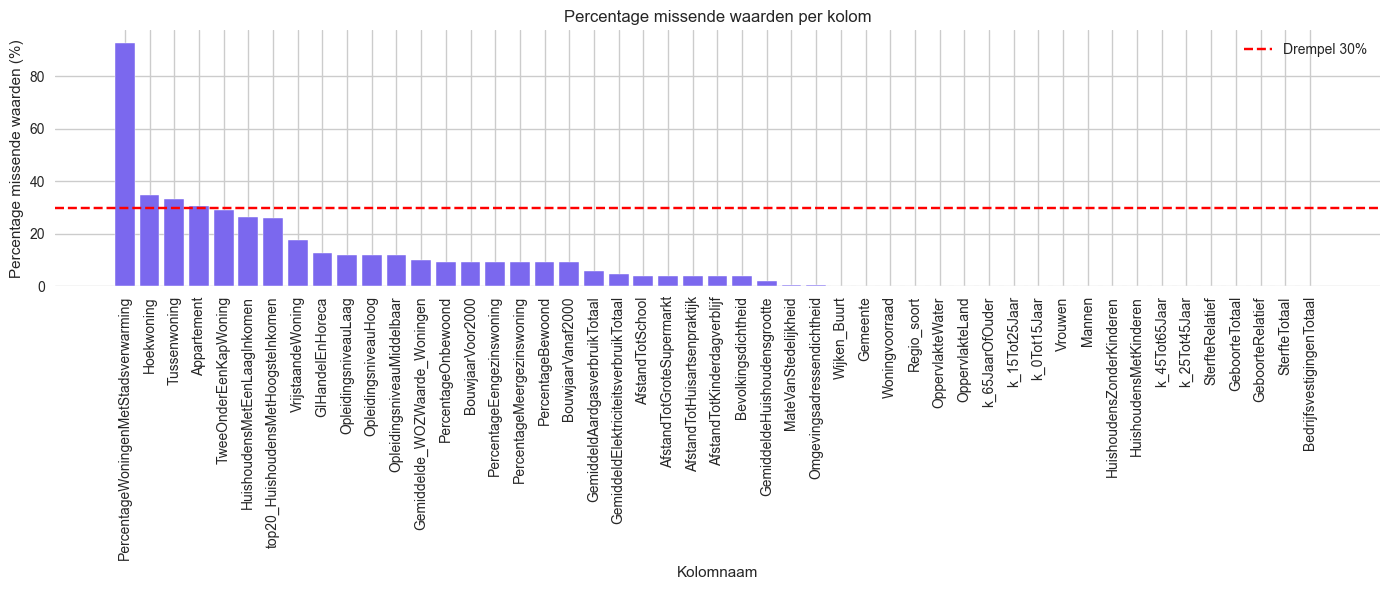

Kolommen die verwijderd worden vanwege te veel missende waarden (>30%):
 ['PercentageWoningenMetStadsverwarming', 'Appartement', 'Tussenwoning', 'Hoekwoning']

Nieuwe datasetvorm na verwijderen kolommen: (17341, 46)

Overzicht van missende waarden na verwijderen:
Wijken_Buurt                                0
Gemeente                                    0
Regio_soort                                 0
Bevolkingsdichtheid                       690
Woningvoorraad                              0
Gemiddelde_WOZWaarde_Woningen            1770
PercentageEengezinswoning                1610
PercentageMeergezinswoning               1610
PercentageBewoond                        1610
PercentageOnbewoond                      1610
GIHandelEnHoreca                         2205
AfstandTotHuisartsenpraktijk              697
AfstandTotGroteSupermarkt                 697
AfstandTotKinderdagverblijf               697
AfstandTotSchool                          697
OppervlakteLand                             0


In [6]:
# Verwijderen van kolommen met te veel missende waarden
missing_percent = buurten.isna().mean() * 100
missing_percent_sorted = missing_percent.sort_values(ascending=False)
plt.figure(figsize=(14,6))
bars = plt.bar(missing_percent_sorted.index, missing_percent_sorted.values, color='mediumslateblue')
plt.xticks(rotation=90)
plt.ylabel("Percentage missende waarden (%)")
plt.xlabel("Kolomnaam")
plt.title("Percentage missende waarden per kolom")
plt.axhline(y=30, color='red', linestyle='--', label='Drempel 30%')
plt.legend()
plt.tight_layout()
plt.show()
threshold = 30
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()
print("Kolommen die verwijderd worden vanwege te veel missende waarden (>30%):\n", cols_to_drop)

buurten_clean = buurten.drop(columns=cols_to_drop)

print("\nNieuwe datasetvorm na verwijderen kolommen:", buurten_clean.shape)
print("\nOverzicht van missende waarden na verwijderen:")
print(buurten_clean.isna().sum())



---

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

## **2. Dataset inspecteren**

Nu dat wij de dataset hebben gefiltered kunnen we kijken naar de interessante informatie. We beginnen met een gestructueerd overzicht via de `.info()` methode. Dit geeft ons het aantal rijen, kolommen, de hoeveelheid bestaande waarden, en de kolom namen. Dit is essentieel voor het begrijpen en schoonmaken van onze data.

In [7]:
# Lucas
# Aantal rijen en kolommen dataframe
buurten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17341 entries, 0 to 17340
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Wijken_Buurt                           17341 non-null  object 
 1   Gemeente                               17341 non-null  object 
 2   Regio_soort                            17341 non-null  object 
 3   Bevolkingsdichtheid                    16651 non-null  float64
 4   Woningvoorraad                         17341 non-null  int64  
 5   Gemiddelde_WOZWaarde_Woningen          15571 non-null  float64
 6   PercentageEengezinswoning              15731 non-null  float64
 7   PercentageMeergezinswoning             15731 non-null  float64
 8   PercentageBewoond                      15731 non-null  float64
 9   PercentageOnbewoond                    15731 non-null  float64
 10  GIHandelEnHoreca                       15136 non-null  float64
 11  Af

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

#### **2.2 Omschrijving van de kolommen**

Onze dataset heeft X aantal rijen en X aantal kolommen. De kolommen hebben wij hieronder beschreven met informatie over wat de kolom is, wat voor type data er in zit, welke eenheden de data in is, en of er missende waarden zijn.


| kolomnaam | omschrijving | type | eenheden | missende waarden |
| ---       |---           | ---  | ---      | ---              |
| ...       | ...  | ...      | ...              |...



#### **2.3 Extra omschrijving numerieke kolommen**

Om nog beter inzicht in de data te krijgen en ook om de data in perspectief te zetten hebben we hieronder laten zien wat de maximale, minimale, gemiddelde, en mediane waardes zijn in alle kolommen. Een grote afwijking van mediaan en gemiddelde komt vaak door uitschieters zoals we kunnen zien in kolommen X en X.


| kolomnaam | maximum | minimum | gemiddelde | mediaan |
|---        | ---     |---      |---         |---      |
|...        | ...     |...      |...         |...      |



In [8]:
# Lucas
mask = []
for col in buurten.columns:
    if pd.api.types.is_numeric_dtype(buurten[col]):
        mask.append(col)

print("Numerieke kolommen in het buurten DataFrame:")
print(*mask, sep=", ")

# Beschrijvende statistieken van alleen de numerieke kolommen
num_stats = buurten[mask].describe()
print("\nStatistieken van numerieke kolommen:")
num_stats

Numerieke kolommen in het buurten DataFrame:
Woningvoorraad, Gemiddelde_WOZWaarde_Woningen, PercentageEengezinswoning, PercentageMeergezinswoning, PercentageBewoond, PercentageOnbewoond, GIHandelEnHoreca, AfstandTotHuisartsenpraktijk, AfstandTotGroteSupermarkt, AfstandTotKinderdagverblijf, AfstandTotSchool, OppervlakteLand, OppervlakteWater, MateVanStedelijkheid, Omgevingsadressendichtheid, top20_HuishoudensMetHoogsteInkomen, HuishoudensMetEenLaagInkomen, HuishoudensMetKinderen, HuishoudensZonderKinderen, OpleidingsniveauLaag, OpleidingsniveauMiddelbaar, OpleidingsniveauHoog, Mannen, Vrouwen, k_0Tot15Jaar, k_15Tot25Jaar, k_25Tot45Jaar, k_45Tot65Jaar, k_65JaarOfOuder, GeboorteTotaal, GeboorteRelatief, SterfteTotaal, SterfteRelatief, GemiddeldElektriciteitsverbruikTotaal, GemiddeldAardgasverbruikTotaal, BouwjaarVoor2000, BouwjaarVanaf2000, PercentageWoningenMetStadsverwarming, GemiddeldeHuishoudensgrootte, Appartement, Tussenwoning, Hoekwoning, TweeOnderEenKapWoning, VrijstaandeWoning, B

,Woningvoorraad,Gemiddelde_WOZWaarde_Woningen,PercentageEengezinswoning,PercentageMeergezinswoning,PercentageBewoond,PercentageOnbewoond,GIHandelEnHoreca,AfstandTotHuisartsenpraktijk,AfstandTotGroteSupermarkt,AfstandTotKinderdagverblijf,...,BouwjaarVoor2000,BouwjaarVanaf2000,PercentageWoningenMetStadsverwarming,GemiddeldeHuishoudensgrootte,Appartement,Tussenwoning,Hoekwoning,TweeOnderEenKapWoning,VrijstaandeWoning,BedrijfsvestigingenTotaal
count,1.734100e+04,15571.000000,15731.000000,15731.000000,15731.000000,15731.000000,15136.000000,16644.000000,16644.000000,16644.000000,...,15731.000000,15731.000000,1239.000000,16980.000000,12005.000000,11536.000000,11331.000000,12299.000000,14252.000000,1.734100e+04
mean,1.820376e+03,311.111168,77.008518,22.991355,94.426165,5.573772,91.974762,1.685010,1.538572,1.095446,...,82.799250,17.200877,40.422228,2.296072,2218.089130,2808.919036,2968.112258,3384.449955,4124.616194,4.689170e+02
std,6.023785e+04,134.618097,26.451711,26.451545,6.834549,6.834206,2853.597998,1.415308,1.336897,0.963158,...,21.864232,21.864396,36.157843,0.429528,603.112537,465.022581,493.268609,621.036488,643.407171,1.554503e+04
min,0.000000e+00,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,1.000000,770.000000,790.000000,1170.000000,1070.000000,1230.000000,0.000000e+00
25%,9.200000e+01,222.000000,68.000000,4.000000,94.000000,2.000000,10.000000,0.700000,0.600000,0.500000,...,81.000000,4.000000,9.000000,2.100000,1830.000000,2540.000000,2680.000000,3000.000000,3690.000000,4.500000e+01
50%,4.070000e+02,286.000000,87.000000,13.000000,96.000000,4.000000,20.000000,1.200000,1.000000,0.700000,...,89.000000,11.000000,23.600000,2.300000,2040.000000,2800.000000,2950.000000,3340.000000,4120.000000,1.100000e+02
75%,1.090000e+03,369.000000,96.000000,32.000000,98.000000,6.000000,55.000000,2.300000,2.100000,1.500000,...,96.000000,19.000000,74.100000,2.500000,2410.000000,3030.000000,3210.000000,3720.000000,4540.000000,2.650000e+02
max,7.891786e+06,2069.000000,100.000000,100.000000,100.000000,100.000000,349180.000000,11.300000,11.200000,9.800000,...,100.000000,100.000000,100.000000,9.000000,5750.000000,6280.000000,6300.000000,7130.000000,7140.000000,2.033385e+06


<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

#### **2.5 Groeperen kolommen**

Om de dataset beter de begrijpen kunnen wij sommige kolommen, zolas *"Woningtype"* groeperen. Dit helpt ons door meer perspectief te kunnnen geven in de data doormiddel van gegroepeerde statestieken en door data analyse later makkelijker en duidelijker te maken.

Wij maken hier de groep Gemeente aan doormiddel van de `.groupby()` methode uit <code style="color:#4EC9B0;">pandas</code>.
Daarna kunnen wij doormiddel van <code style="color:#CE9178;">seaborn</code> en <code style="color:#CE9178;">matplotlib</code> wat visuele overzichten creëeren om meer inzicht te creëeren in de data.

C:\Users\joris\AppData\Local\Temp\ipykernel_13420\2984509677.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom[i] + data1[col].iloc[i] / 2,


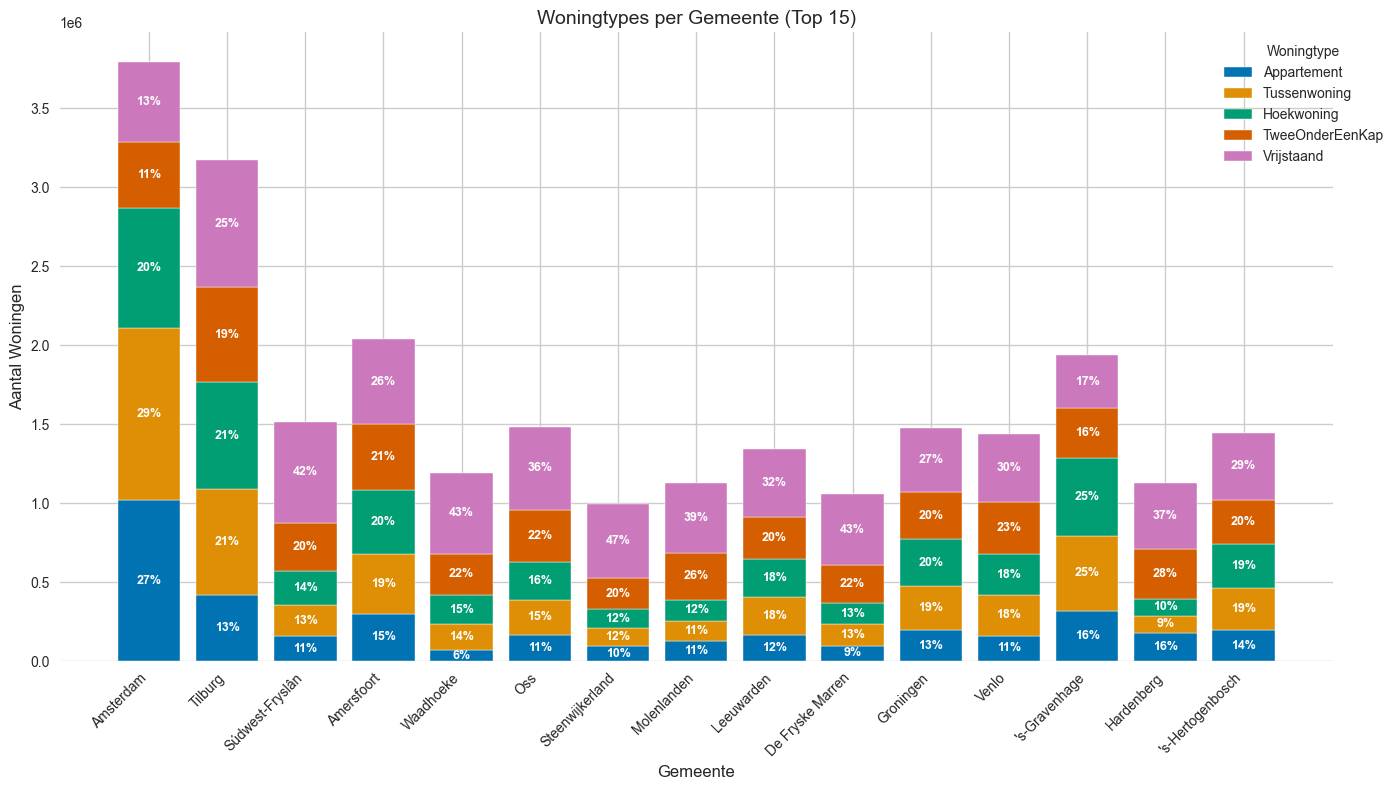

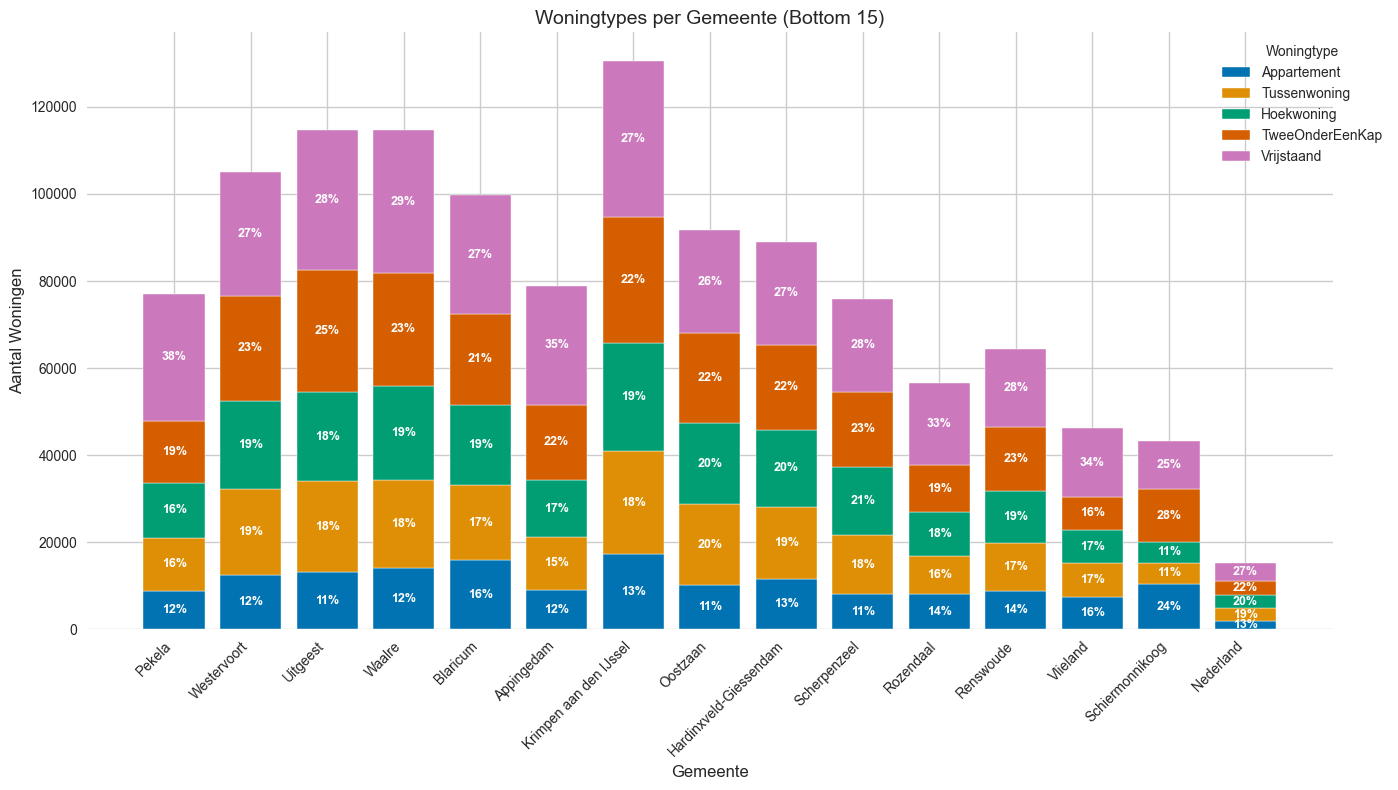

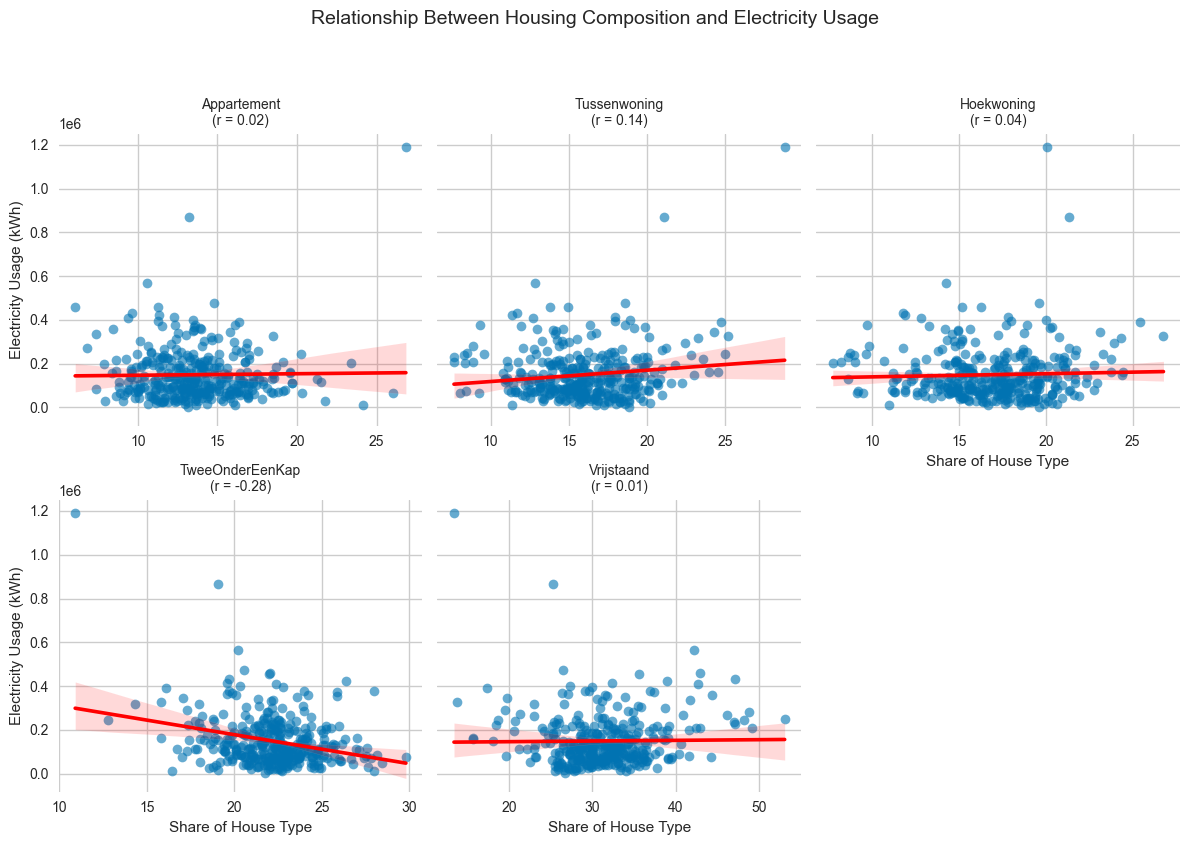

In [9]:
# Lucas

# dataframe opzetten voor de huizen
woningen = df[['WijkenEnBuurten','Gemeentenaam_1','GemiddeldElektriciteitsverbruikTotaal_47','Appartement_48', 'Tussenwoning_49', 'Hoekwoning_50', 'TweeOnderEenKapWoning_51', 'VrijstaandeWoning_52', 'Huurwoning_53', 'EigenWoning_54']].copy()
woning_types = ['Appartement', 'Tussenwoning', 'Hoekwoning', 'TweeOnderEenKap', 'Vrijstaand']

# betere kolom namen
cols = {
    'WijkenEnBuurten' : 'WijkenEnBuurten',
    'Gemeentenaam_1' : 'Gemeentenaam',
    'GemiddeldElektriciteitsverbruikTotaal_47': 'Elektriciteitsverbruik',
    'Appartement_48': 'Appartement', 
    'Tussenwoning_49': 'Tussenwoning', 
    'Hoekwoning_50': 'Hoekwoning',
    'TweeOnderEenKapWoning_51': 'TweeOnderEenKap', 
    'VrijstaandeWoning_52': 'Vrijstaand',
    'Huurwoning_53' : 'Huurwoning', 
    'EigenWoning_54': 'EigenWoning'
}
woningen.rename(columns=cols, inplace=True)

# Het dataframe schoonmaken van de spaties in de benamingen
woningen_clean = woningen.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# toevoegen totaal kolom
woningen_clean['Woningentotaal'] = woningen_clean[woning_types].sum(axis = 1)

# Creeer een gegroepeerde dataset voor gemeentes
woningen_clean_gemeente_grouped = woningen_clean.groupby('Gemeentenaam').sum()
woningen_clean_gemeente_grouped = woningen_clean_gemeente_grouped.drop(['WijkenEnBuurten', 'Huurwoning', 'EigenWoning'], axis = 1)

# gesorteerde dataset met een kortere naam
wcggs = woningen_clean_gemeente_grouped.sort_values('Elektriciteitsverbruik', ascending=False)

# kopieer en converteer naar percentage van de huissoorten
wcggs_perc = wcggs.copy()
for i, col in enumerate(woning_types):
    wcggs_perc[col] = wcggs_perc[col] / wcggs_perc['Woningentotaal'] * 100

# definieer een functie om een plot te tonen van de huizen
def plot_woningen(data1, data2, tit):
    plt.figure(figsize=(14, 8))
    bottom = np.zeros(len(data1))

    for col in woning_types:
        plt.bar(data1.index, data1[col], bottom=bottom, label=col)

        for i, val in enumerate(data2[col]):
            if val > 0:
                plt.text(
                    i,
                    bottom[i] + data1[col].iloc[i] / 2,
                    f"{val:,.0f}" + '%',
                    ha='center', va='center',
                    color='white', fontsize=9, fontweight='bold'
                )

        bottom += data1[col]

    plt.title(tit, fontsize=14)
    plt.xlabel('Gemeente', fontsize=12)
    plt.ylabel('Aantal Woningen', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Woningtype', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# stel de data in en plot deze
d1 = wcggs.head(15)
d2 = wcggs_perc.head(15)
plot_woningen(d1, d2, 'Woningtypes per Gemeente (Top 15)')

d1 = wcggs.tail(15)
d2 = wcggs_perc.tail(15)
plot_woningen(d1, d2, 'Woningtypes per Gemeente (Bottom 15)')

# Melt the data into long format
df_long = wcggs_perc.melt(
    id_vars='Elektriciteitsverbruik',
    value_vars=woning_types,
    var_name='woning_type',
    value_name='deel'
)

# Correlatie check
correlation = wcggs_perc[col].corr(wcggs_perc['Elektriciteitsverbruik'])

# zet de grafieken in 1 deel
g = sns.FacetGrid(df_long, col='woning_type', col_wrap=3, height=4, sharex=False, sharey=True)
g.map(sns.regplot, 'deel', 'Elektriciteitsverbruik', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Geef ze de juiste titels
for ax, col in zip(g.axes.flat, woning_types):
    correlation = wcggs_perc[col].corr(wcggs_perc['Elektriciteitsverbruik'])
    ax.set_title(f"{col}\n(r = {correlation:.2f})", fontsize=10)

g.set_axis_labels("Share of House Type", "Electricity Usage (kWh)")
g.figure.suptitle("Relationship Between Housing Composition and Electricity Usage", fontsize=14, y=1.05)
g.tight_layout()
plt.show()


Er lijkt geen sterke correlatie te zijn tussen gemeentes en een specifieke woning soort. Wel kunnen we kijken naar het elektriciteitsverbruik relatief tot de woning soorten. Hieruit blijken een paar inzichten:

**Belangrijkste bevindingen:**

- Er is een zwakke positieve correlatie tussen 'Tussen woningen' (rijtjeshuizen) en het elektriciteitsverbruik.

- Er is bijna een medium negatieve correlatie tussen de Twee onder een kap woningen en het elektriciteitsverbruik.

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

#### **2.6 Basisstatistieken per gemeente**

Om de data verder te verkennen gaan we nu wat meer basisstatistieken opzoeken over de gemeentes. We gaan de totalen, gemiddleden, en medianen berekenen doormiddel van <code style="color:#9CDCFE;"> numpy</code>. Deze geven ons inzicht in verschillen tussen gemeenten. Daaruit kunnen wij conclusies of voorspellingen halen.

Wij hebben de volgende ondervindingen gedaan:

- 
- 
- 
- 

In [10]:
# Basisstatistieken:
buurten_tot = buurten.groupby("Gemeente").sum(numeric_only=True)
print(buurten_tot.head())

buurten_mean = buurten.groupby('Gemeente').mean(numeric_only=True)
print(buurten_mean.head())

buurten_median = buurten.groupby('Gemeente').median(numeric_only=True)
print(buurten_median.head())
# Totalen per gemeente

                                          Bevolkingsdichtheid  Woningvoorraad  \
Gemeente                                                                        
's-Gravenhage                                       1378064.0          787476   
's-Hertogenbosch                                     386597.0          218973   
Aa en Hunze                                           18520.0           33537   
Aalsmeer                                              22996.0           39651   
Aalten                                                43426.0           35928   

                                          Gemiddelde_WOZWaarde_Woningen  \
Gemeente                                                                  
's-Gravenhage                                                   47884.0   
's-Hertogenbosch                                                34954.0   
Aa en Hunze                                                     18984.0   
Aalsmeer                                                 

In [11]:
# Basisstatistieken:
buurten_mannen = buurten.groupby('Gemeente')['Mannen'].sum()
buurten_vrouwen = buurten.groupby('Gemeente')['Vrouwen'].sum()
buurten_inwoners = buurten_mannen + buurten_vrouwen

perc_mannen = (buurten_mannen / buurten_inwoners) * 100
perc_vrouwen = (buurten_vrouwen / buurten_inwoners) * 100

print(perc_mannen)
print(perc_vrouwen)

# Percentages

Gemeente
's-Gravenhage                               49.668165
's-Hertogenbosch                            49.390811
Aa en Hunze                                 49.922044
Aalsmeer                                    49.631660
Aalten                                      50.336074
                                              ...    
Zundert                                     51.037737
Zutphen                                     49.027080
Zwartewaterland                             50.813988
Zwijndrecht                                 48.483267
Zwolle                                      49.280300
Length: 356, dtype: float64
Gemeente
's-Gravenhage                               50.331835
's-Hertogenbosch                            50.609189
Aa en Hunze                                 50.077956
Aalsmeer                                    50.368340
Aalten                                      49.663926
                                              ...    
Zundert                             

---

<!-- Zet de regel afstand voor betere leesbaarheid -->
<div style="line-height:1.6;">

## 3. **Voorlopige conclusie**

Deze analyse heeft duidelijke patronen bevonden op dit dit en dit vlak. De gemeenten zouden dit dit en dit kunnen doen om de druk op het electriciteitsnet te verlagen.

**Belangrijkste prestaties:**

<!-- Placeholders -->

- Er zijn XXXX observaties verwerkt, waarmee 95,0% van de oorspronkelijke dataset is behouden.
- Geen enkele gemeente doet iets heel ergs
- Op weekdagen werd een stijging van zoveel energie gemeten
- Er zijn 69 gemeenten zijn in kaart gebracht, waarbij hoogrisicogebieden en verschillen tussen provincies zijn geïdentificeerd.

---

## Sprint 4

## Sprint 5

## Sprint 6

### Eindadvies